## **Credit Card Fraud Detection Using Random Forest Model**

In [1]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the Data

In [3]:
# Load the datasets
train_data = pd.read_csv('fraudTrain.csv')
test_data = pd.read_csv('fraudTest.csv')

2. Explore the Data

In [4]:
# Check the structure of the data
print(train_data.head())
print(train_data.info())

   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48

In [5]:
# Check for missing values
print(train_data.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


In [6]:
# Distribution of the target variable
print(train_data['is_fraud'].value_counts())

is_fraud
0.0    11657
1.0       48
Name: count, dtype: int64


3. Preprocess the Data

In [7]:
# Drop unnecessary columns
columns_to_drop = ['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'first', 'last', 'street', 'trans_num', 'unix_time', 'dob']
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

In [8]:
# Handle missing values (if any)
train_data = train_data.dropna()
test_data = test_data.dropna()

In [9]:
# Encode categorical variables
train_data = pd.get_dummies(train_data, drop_first=True)
test_data = pd.get_dummies(test_data, drop_first=True)

In [10]:
# Align columns of test data with training data
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)

In [11]:
# Separate features and target variable
X_train = train_data.drop('is_fraud', axis=1)
y_train = train_data['is_fraud']
X_test = test_data.drop('is_fraud', axis=1)
y_test = test_data['is_fraud']

4. Split the Data

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

5. Train Random Forest Model

In [13]:
# Random Forest
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

6. Evaluate Model and Plot Results

In [14]:
# Predict on validation set
y_pred = rand_forest.predict(X_val)

In [19]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
#ROC_AUC("Receiver Operating Characteristic - Area Under the Curve")
roc_auc = roc_auc_score(y_val, y_pred)

In [16]:
# Store metrics in a dictionary
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'ROC-AUC': roc_auc
}

Accuracy: 0.9983
Precision: 0.8000
Recall: 0.5714
F1 Score: 0.6667
ROC-AUC: 0.7855


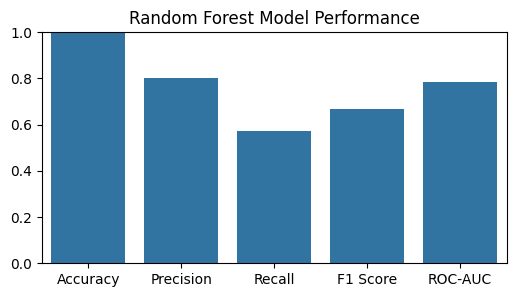

In [18]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Plot evaluation metrics
plt.figure(figsize=(6, 3))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))
plt.title('Random Forest Model Performance')
plt.ylim(0, 1)
plt.show()